In [1]:
# print current environment name
import os
print(os.environ.get('CONDA_DEFAULT_ENV'))
import xarray as xr

geo


In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import dask 

define the path

In [11]:
path = '/mnt/d/Dropbox/R_projects/SVpheno/data/esICE/'

In [12]:
# list oìall files in the directory
files = os.listdir(path)
files

['202001_sea-ice_crop.nc',
 '202002_sea-ice_crop.nc',
 '202003_sea-ice_crop.nc',
 '202004_sea-ice_crop.nc',
 '202005_sea-ice_crop.nc',
 '202006_sea-ice_crop.nc',
 '202007_sea-ice_crop.nc',
 '202008_sea-ice_crop.nc',
 '202009_sea-ice_crop.nc',
 '202010_sea-ice_crop.nc',
 '202011_sea-ice_crop.nc',
 '202012_sea-ice_crop.nc',
 '202101_sea-ice_crop.nc',
 '202102_sea-ice_crop.nc',
 '202103_sea-ice_crop.nc',
 '202104_sea-ice_crop.nc',
 '202105_sea-ice_crop.nc',
 '202106_sea-ice_crop.nc',
 '202107_sea-ice_crop.nc',
 '202108_sea-ice_crop.nc',
 '202109_sea-ice_crop.nc',
 '202110_sea-ice_crop.nc',
 '202111_sea-ice_crop.nc',
 '202112_sea-ice_crop.nc',
 '202201_sea-ice_crop.nc',
 '202202_sea-ice_crop.nc',
 '202203_sea-ice_crop.nc',
 '202204_sea-ice_crop.nc',
 '202205_sea-ice_crop.nc',
 '202206_sea-ice_crop.nc',
 '202207_sea-ice_crop.nc',
 '202208_sea-ice_crop.nc',
 '202209_sea-ice_crop.nc',
 '202210_sea-ice_crop.nc',
 '202211_sea-ice_crop.nc',
 '202212_sea-ice_crop.nc']

In [22]:
# load all netcdf files in path
ds = xr.open_mfdataset(path+'/*.nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:  (x: 240, y: 52, time: 1096)
Coordinates:
  * x        (x) float64 -9.875 -9.625 -9.375 -9.125 ... 49.12 49.38 49.62 49.88
  * y        (y) float64 84.88 84.62 84.38 84.12 ... 72.88 72.62 72.38 72.12
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2022-12-31
Data variables:
    crs      (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    ICE_CON  (time, y, x) float32 dask.array<chunksize=(31, 52, 240), meta=np.ndarray>
Attributes: (12/49)
    title:                     Sea Ice Concentrations from Nimbus-7 SMMR and ...
    summary:                   This data set is generated from brightness tem...
    id:                        10.5067/MPYG15WAA4WX
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/MPYG15WAA4WX
    ...                        ...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    product_version:           v2.0
    source:                    Polar stereographic brightness temperatures fr...
    instrument:                SSMIS > Special Sensor Microwave Imager/Sounder
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...

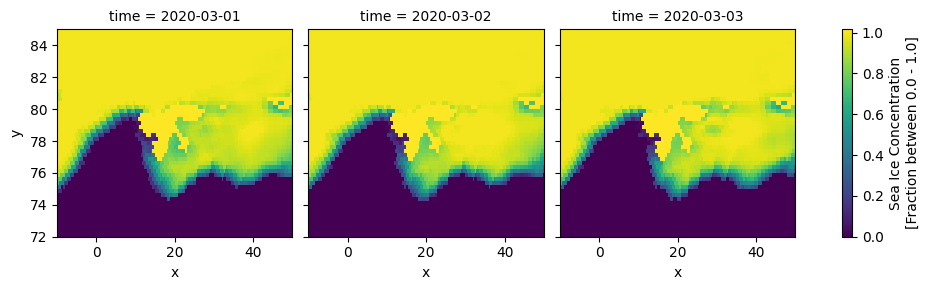

In [23]:
#plot 3 days (as an example)
es = ds.sel(time=slice('2020-03-01', '2020-03-03'))
es
# plot
es['ICE_CON'].plot(col='time', col_wrap=3)

# ICE - n. of days

In [40]:
# transform ICE_CON to 0-1 using the threshold 0.15 (no ice/ice)
ds['ICE'] = xr.where(ds['ICE_CON'] < 0.15, 0, 1)
ds

<xarray.Dataset>
Dimensions:  (x: 240, y: 52, time: 1096)
Coordinates:
  * x        (x) float64 -9.875 -9.625 -9.375 -9.125 ... 49.12 49.38 49.62 49.88
  * y        (y) float64 84.88 84.62 84.38 84.12 ... 72.88 72.62 72.38 72.12
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2022-12-31
Data variables:
    crs      (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    ICE_CON  (time, y, x) float32 dask.array<chunksize=(31, 52, 240), meta=np.ndarray>
    ICE      (time, y, x) int64 dask.array<chunksize=(31, 52, 240), meta=np.ndarray>
Attributes: (12/49)
    title:                     Sea Ice Concentrations from Nimbus-7 SMMR and ...
    summary:                   This data set is generated from brightness tem...
    id:                        10.5067/MPYG15WAA4WX
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/MPYG15WAA4WX
    ...                        ...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    product_version:           v2.0
    source:                    Polar stereographic brightness temperatures fr...
    instrument:                SSMIS > Special Sensor Microwave Imager/Sounder
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...

In [ ]:
# surface for each cell of the ds

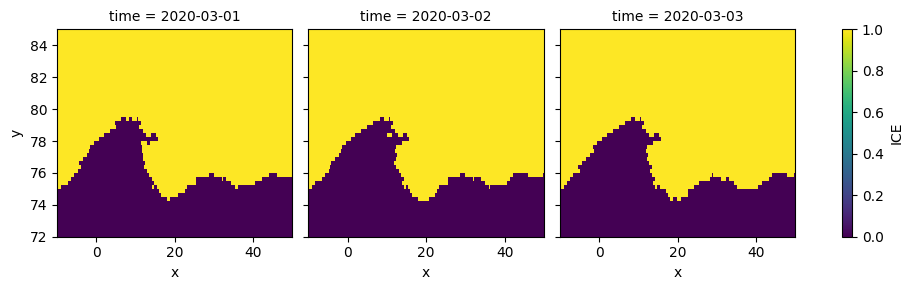

In [30]:
# plot 3 days (as an example)
es = ds.sel(time=slice('2020-03-01', '2020-03-03'))
es
# plot
es['ICE'].plot(col='time', col_wrap=3)

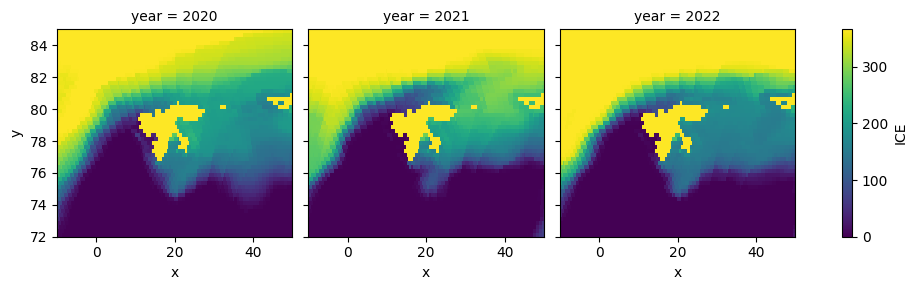

In [38]:
# for each year, for each cell, calculate the number of days with ice
# groupby year and sum ICE
ds_year = ds.groupby('time.year').sum(dim='time')
ds_year


ds_year['ICE'].plot(col='year', col_wrap=3)

In [39]:
# delete ICE_CON
del ds_year['ICE_CON']
ds_year

<xarray.Dataset>
Dimensions:  (x: 240, y: 52, year: 3)
Coordinates:
  * x        (x) float64 -9.875 -9.625 -9.375 -9.125 ... 49.12 49.38 49.62 49.88
  * y        (y) float64 84.88 84.62 84.38 84.12 ... 72.88 72.62 72.38 72.12
  * year     (year) int64 2020 2021 2022
Data variables:
    crs      (year) int64 0 0 0
    ICE      (year, y, x) int64 dask.array<chunksize=(1, 52, 240), meta=np.ndarray>
Attributes: (12/49)
    title:                     Sea Ice Concentrations from Nimbus-7 SMMR and ...
    summary:                   This data set is generated from brightness tem...
    id:                        10.5067/MPYG15WAA4WX
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/MPYG15WAA4WX
    ...                        ...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    product_version:           v2.0
    source:                    Polar stereographic brightness temperatures fr...
    instrument:                SSMIS > Special Sensor Microwave Imager/Sounder
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...

In [ ]:
# save to netcdf
ds_year.to_netcdf('/mnt/d/Dropbox/R_projects/SVpheno/data/esICE/es_days_ICE_year.nc')